In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the data
data = pd.read_pickle("../Data/final_data1.df")
# data = pd.read_pickle("../Data/old_data.df")
data.replace("New Jersey Nets", "Brooklyn Nets", inplace=True)
data.replace("New Orleans Hornets", "New Orleans Pelicans", inplace=True)
data.replace("Charlotte Bobcats", "Charlotte Hornets", inplace=True)
data.replace("LA Clippers", "Los Angeles Clippers", inplace=True)
data.replace("NJN", "BRK", inplace=True)
data.replace("NOH", "NOP", inplace=True)
data.replace("CHA", "CHO", inplace=True)
data.replace("CHH", "CHO", inplace=True)
data.replace("VAN", "MEM", inplace=True)
data.replace("SEA", "OKC", inplace=True)
data.replace("NOK", "NOP", inplace=True)

data.rename(columns={"Name":"Player", "Guard":"G", "Center":"C", "Forward":"F", 
                     "awardCount":"awards", "mock1":"m1", "mock2":"m2", "mock3":"m3", "mock4":"m4",
                     "mock5":"m5", "mock6":"m6", }, inplace=True)
data = data.drop_duplicates(subset=["Player"])

# REMOVE VALUES THAT HAVE NOT PLAYED 3 YEARS
# data = data[data.did3years==True]

data.reset_index(drop=True, inplace=True)
x_cols = ['gamesPlayed', 'minutes', 'FT%', '3P%', 'SOS',
       'PER', 'eFG%', 'ORB%', 'DRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%',
       'OWS', 'DWS', 'FTA', 'FGA', 'MP', '3PA', 'PTS', 'PF', 'MP_per_PF',
       'FTA_per_FGA', 'MP_per_3PA', 'PTS_per_FGA', 'ORtg', 'DRtg', # "WING_DIFF",
       'awards', # 'age', 
       'RSCI', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'SHUTTLE_RUN',
       'THREE_QUARTER_SPRINT', 'STANDING_VERTICAL', 'MAX_VERTICAL',
       'BENCH_PRESS', 'BODY_FAT', 'HAND_LENGTH', 'HAND_WIDTH', "didCombine", 
       'HEIGHT_W_SHOES', 'REACH', 'WEIGHT', 'WINGSPAN', 'C', 'F', 'G']
X = data[x_cols]
data["WM"] = [(data["EWA"].iloc[i]+data["WP"].iloc[i] + data["WS"].iloc[i])/3. for i in range(len(data))]
Y = data["WM"]

In [2]:
data.columns

Index(['Pk', 'Tm', 'Player', 'Year', 'HEIGHT', 'HEIGHT_W_SHOES', 'REACH',
       'WEIGHT', 'WINGSPAN', 'WING_DIFF', 'SHUTTLE_RUN',
       'THREE_QUARTER_SPRINT', 'STANDING_VERTICAL', 'MAX_VERTICAL',
       'BENCH_PRESS', 'BODY_FAT', 'HAND_LENGTH', 'HAND_WIDTH', 'collegeYear',
       'gamesPlayed', 'minutes', 'FT%', '3P%', 'SOS', 'PER', 'eFG%', 'ORB%',
       'DRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'USG%', 'OWS', 'DWS', 'FTA',
       'FGA', 'MP', '3PA', 'PTS', 'PF', 'ORtg', 'DRtg', 'MP_per_PF',
       'FTA_per_FGA', 'MP_per_3PA', 'PTS_per_FGA', 'awards', 'RSCI', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'EWA', 'WS', 'WP', 'did3years',
       'didAnyYears', 'didCombine', 'C', 'F', 'G', 'WM'],
      dtype='object')

In [3]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

if "WM_pred" in data.columns:
    data.drop(["WM_pred"], axis=1, inplace=True)

loo = LeaveOneOut()
preds = pd.DataFrame(index=data.index, columns=["WM_pred"])
for train_index, test_index in loo.split(X):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    rawData = data.iloc[train_index]
    
    # Choose what type of data to train on (all non-missing, at least one year, at least 3 years)
    # present_index = rawData.did3years == True
    # present_index = rawData.didAnyYears == True
    present_index = Y_train.isnull()==False
    X_train = X_train.loc[present_index]
    Y_train = Y_train.loc[present_index]
    if Y_train.isnull().any():
        print("Problem")
        continue
        
    params = {"n_estimators":100, "n_jobs":-1}

    RF = Pipeline([('scaler', StandardScaler()), 
                   ('model', RandomForestRegressor(**params))])
    RF.fit(X_train, Y_train)
    preds["WM_pred"].iloc[test_index] = RF.predict(X_test)
    
    print("{}/{} complete!".format(test_index[0]+1, len(X)))
    
data = pd.concat([data, preds], axis=1, sort=False)
datatypes = {"WM_pred":float}
data = data.astype(datatypes)

1/688 complete!
2/688 complete!
3/688 complete!
4/688 complete!
5/688 complete!
6/688 complete!
7/688 complete!
8/688 complete!
9/688 complete!
10/688 complete!
11/688 complete!
12/688 complete!
13/688 complete!
14/688 complete!
15/688 complete!
16/688 complete!
17/688 complete!
18/688 complete!
19/688 complete!
20/688 complete!
21/688 complete!
22/688 complete!
23/688 complete!
24/688 complete!
25/688 complete!
26/688 complete!
27/688 complete!
28/688 complete!
29/688 complete!
30/688 complete!
31/688 complete!
32/688 complete!
33/688 complete!
34/688 complete!
35/688 complete!
36/688 complete!
37/688 complete!
38/688 complete!
39/688 complete!
40/688 complete!
41/688 complete!
42/688 complete!
43/688 complete!
44/688 complete!
45/688 complete!
46/688 complete!
47/688 complete!
48/688 complete!
49/688 complete!
50/688 complete!
51/688 complete!
52/688 complete!
53/688 complete!
54/688 complete!
55/688 complete!
56/688 complete!
57/688 complete!
58/688 complete!
59/688 complete!
60/688

463/688 complete!
464/688 complete!
465/688 complete!
466/688 complete!
467/688 complete!
468/688 complete!
469/688 complete!
470/688 complete!
471/688 complete!
472/688 complete!
473/688 complete!
474/688 complete!
475/688 complete!
476/688 complete!
477/688 complete!
478/688 complete!
479/688 complete!
480/688 complete!
481/688 complete!
482/688 complete!
483/688 complete!
484/688 complete!
485/688 complete!
486/688 complete!
487/688 complete!
488/688 complete!
489/688 complete!
490/688 complete!
491/688 complete!
492/688 complete!
493/688 complete!
494/688 complete!
495/688 complete!
496/688 complete!
497/688 complete!
498/688 complete!
499/688 complete!
500/688 complete!
501/688 complete!
502/688 complete!
503/688 complete!
504/688 complete!
505/688 complete!
506/688 complete!
507/688 complete!
508/688 complete!
509/688 complete!
510/688 complete!
511/688 complete!
512/688 complete!
513/688 complete!
514/688 complete!
515/688 complete!
516/688 complete!
517/688 complete!
518/688 co

WM MSE: 2.369810468228582


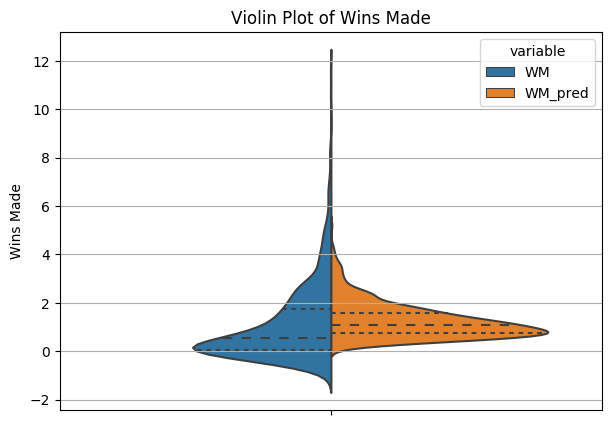

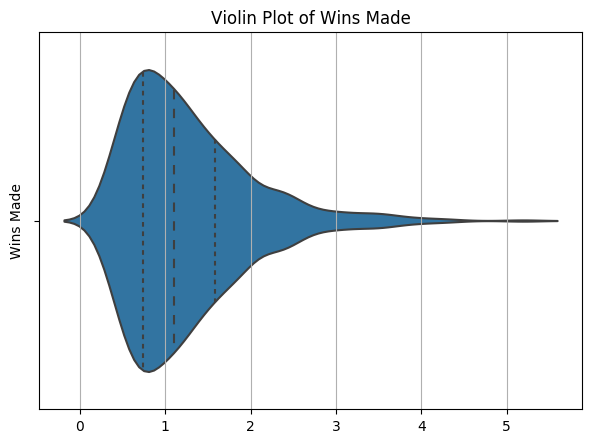

In [4]:
# Calculate some of the errors
from sklearn.metrics import mean_squared_error
print("WM MSE: {}".format(mean_squared_error(data.loc[data["WM"].isnull()==False]["WM"], preds.loc[data["WM"].isnull()==False]["WM_pred"], squared=True)))

# Some plotting of these
import seaborn as sns

plt.figure(figsize=(7,5), dpi=100)
plt.title("Violin Plot of Wins Made")
plt.grid()
plotData = data[["WM", "WM_pred"]].melt().assign(x="")
sns.violinplot(data=plotData, x="x", y="value", hue="variable", inner="quartile", split=True)
plt.ylabel("Wins Made")
plt.xlabel("")
plt.show()

plt.figure(figsize=(7,5), dpi=100)
plt.title("Violin Plot of Wins Made")
plt.grid()
sns.violinplot(data=data, x="WM_pred", inner="quartile", split=True)
plt.ylabel("Wins Made")
plt.xlabel("")
plt.show()


In [5]:
# Create a mock draft to evaluate how many wins are gained
data.rename(columns={"Year":"draftYear", "Tm":"NBAteam", "Pk":"overallPick", "Player":"Name"}, inplace=True)
# data = data.astype({"draftYear":int, "overallPick":int})
selectData = data# [data.did3years==True] # SNEAKY HERE - WATCH OUT
simData = pd.DataFrame(columns=["team", "oldPick", "newPick", "year"])
ALL_TEAMS = data["NBAteam"].unique()
for year in np.unique(data["draftYear"]):
    if year > 2015:
        continue
    yearData = selectData.loc[data["draftYear"]==year]
    yearData.sort_values(by=["overallPick"], inplace=True)
    picks, teams = yearData["overallPick"].to_numpy(), yearData["NBAteam"].to_numpy()
    picks, teams = picks[~pd.isnull(picks)], teams[~pd.isnull(teams)]
    
    for myTeam in ALL_TEAMS:
        print("YEAR: {}, TEAM: {}".format(year, myTeam))
        oldPicks = yearData.loc[yearData["NBAteam"]==myTeam]["Name"].to_numpy()
        myPicks = yearData.loc[yearData["NBAteam"]==myTeam]['overallPick'].to_numpy()
        alreadyPicked = []
        myActualPicks = []
        
        # Figure out what the new picks will be
        for pick in picks:
            avalPicks = yearData[~yearData.Name.isin(alreadyPicked)]
                
            if pick in myPicks:
                # Choose highest remaining target value
                myPick = avalPicks.loc[avalPicks["WM_pred"]==max(avalPicks["WM_pred"])]["Name"].iloc[0]
                alreadyPicked.append(myPick)
                myActualPicks.append(myPick)
            else:
                theirPick = avalPicks.loc[avalPicks['overallPick']==min(avalPicks['overallPick'])]["Name"].iloc[0]
                alreadyPicked.append(theirPick)
        if len(np.unique(myActualPicks))!=len(myActualPicks):
            print("ERROR")
        for i in range(len(myPicks)):
            teamSeries = pd.Series(index=["team", "oldPick", "newPick", "year", "overallPick"])
            teamSeries["year"] = year
            teamSeries["team"] = myTeam
            teamSeries["oldPick"] = oldPicks[i]
            teamSeries["newPick"] = myActualPicks[i]
            teamSeries['overallPick'] = myPicks[i]
            
            simData = simData.append(teamSeries, ignore_index=True)
            

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


YEAR: 2000, TEAM: PHI
YEAR: 2000, TEAM: LAL
YEAR: 2000, TEAM: BOS
YEAR: 2000, TEAM: PHO
YEAR: 2000, TEAM: SAC
YEAR: 2000, TEAM: ORL
YEAR: 2000, TEAM: MIN
YEAR: 2000, TEAM: DAL
YEAR: 2000, TEAM: CHO
YEAR: 2000, TEAM: DET
YEAR: 2000, TEAM: DEN
YEAR: 2000, TEAM: MIA
YEAR: 2000, TEAM: CHI
YEAR: 2000, TEAM: MIL
YEAR: 2000, TEAM: IND
YEAR: 2000, TEAM: ATL
YEAR: 2000, TEAM: POR
YEAR: 2000, TEAM: BRK
YEAR: 2000, TEAM: TOR
YEAR: 2000, TEAM: UTA
YEAR: 2000, TEAM: SAS
YEAR: 2000, TEAM: NOP
YEAR: 2000, TEAM: NYK
YEAR: 2000, TEAM: HOU
YEAR: 2000, TEAM: MEM
YEAR: 2000, TEAM: LAC
YEAR: 2000, TEAM: GSW
YEAR: 2000, TEAM: OKC
YEAR: 2000, TEAM: WAS
YEAR: 2000, TEAM: CLE
YEAR: 2001, TEAM: PHI
YEAR: 2001, TEAM: LAL
YEAR: 2001, TEAM: BOS
YEAR: 2001, TEAM: PHO
YEAR: 2001, TEAM: SAC
YEAR: 2001, TEAM: ORL
YEAR: 2001, TEAM: MIN
YEAR: 2001, TEAM: DAL
YEAR: 2001, TEAM: CHO
YEAR: 2001, TEAM: DET
YEAR: 2001, TEAM: DEN
YEAR: 2001, TEAM: MIA
YEAR: 2001, TEAM: CHI
YEAR: 2001, TEAM: MIL
YEAR: 2001, TEAM: IND
YEAR: 2001

YEAR: 2012, TEAM: ATL
YEAR: 2012, TEAM: POR
YEAR: 2012, TEAM: BRK
YEAR: 2012, TEAM: TOR
YEAR: 2012, TEAM: UTA
YEAR: 2012, TEAM: SAS
YEAR: 2012, TEAM: NOP
YEAR: 2012, TEAM: NYK
YEAR: 2012, TEAM: HOU
YEAR: 2012, TEAM: MEM
YEAR: 2012, TEAM: LAC
YEAR: 2012, TEAM: GSW
YEAR: 2012, TEAM: OKC
YEAR: 2012, TEAM: WAS
YEAR: 2012, TEAM: CLE
YEAR: 2013, TEAM: PHI
YEAR: 2013, TEAM: LAL
YEAR: 2013, TEAM: BOS
YEAR: 2013, TEAM: PHO
YEAR: 2013, TEAM: SAC
YEAR: 2013, TEAM: ORL
YEAR: 2013, TEAM: MIN
YEAR: 2013, TEAM: DAL
YEAR: 2013, TEAM: CHO
YEAR: 2013, TEAM: DET
YEAR: 2013, TEAM: DEN
YEAR: 2013, TEAM: MIA
YEAR: 2013, TEAM: CHI
YEAR: 2013, TEAM: MIL
YEAR: 2013, TEAM: IND
YEAR: 2013, TEAM: ATL
YEAR: 2013, TEAM: POR
YEAR: 2013, TEAM: BRK
YEAR: 2013, TEAM: TOR
YEAR: 2013, TEAM: UTA
YEAR: 2013, TEAM: SAS
YEAR: 2013, TEAM: NOP
YEAR: 2013, TEAM: NYK
YEAR: 2013, TEAM: HOU
YEAR: 2013, TEAM: MEM
YEAR: 2013, TEAM: LAC
YEAR: 2013, TEAM: GSW
YEAR: 2013, TEAM: OKC
YEAR: 2013, TEAM: WAS
YEAR: 2013, TEAM: CLE
YEAR: 2014

In [6]:
# Calculate the average added wins !!!!!!!
resultCols = ["team", "oldWins", "newWins", "addedWins", "numPicks"]
resultsData = pd.DataFrame(columns=resultCols)
for team in np.unique(simData["team"]):
    teamData = simData[simData["team"]==team]
    oldWins, newWins = [], []
    for i in range(len(teamData)):
        oldPlayer = teamData["oldPick"].iloc[i]
        newPlayer = teamData["newPick"].iloc[i]
        oW = data[data["Name"]==oldPlayer]["WM"].iloc[0]
        nW = data[data["Name"]==newPlayer]["WM"].iloc[0]
        if pd.isnull(oW) or pd.isnull(nW):
            continue
        oldWins.append(oW)
        newWins.append(nW)

    resultSeries = pd.Series(index=resultCols)
    resultSeries["team"] = team
    resultSeries["oldWins"] = np.mean(oldWins)
    resultSeries["newWins"] = np.mean(newWins)
    resultSeries["addedWins"] = np.mean([newWins[i] - oldWins[i] for i in range(len(newWins))])# np.mean(newWins) - np.mean(oldWins)
    resultSeries["numPicks"] = len(teamData)
    resultsData = resultsData.append(resultSeries, ignore_index=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


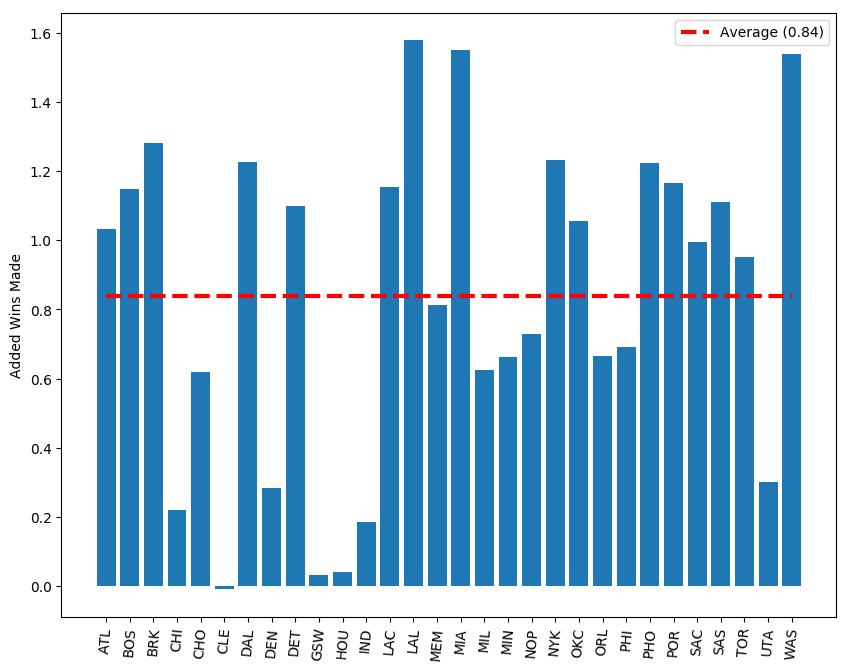

In [7]:
# Create a plot from this!
plt.figure(figsize=(10,8), dpi=100)
labels = resultsData.team.to_numpy()
heights = resultsData.addedWins.to_numpy()
avgHeight = np.mean(heights)

x = range(len(labels))
plt.bar(x, heights)
plt.plot([min(x), max(x)], [avgHeight, avgHeight], "--r", linewidth=3, label="Average ({:.2f})".format(avgHeight))
plt.legend()

plt.ylabel("Added Wins Made")
plt.xticks(x, labels, rotation=85)
plt.show()

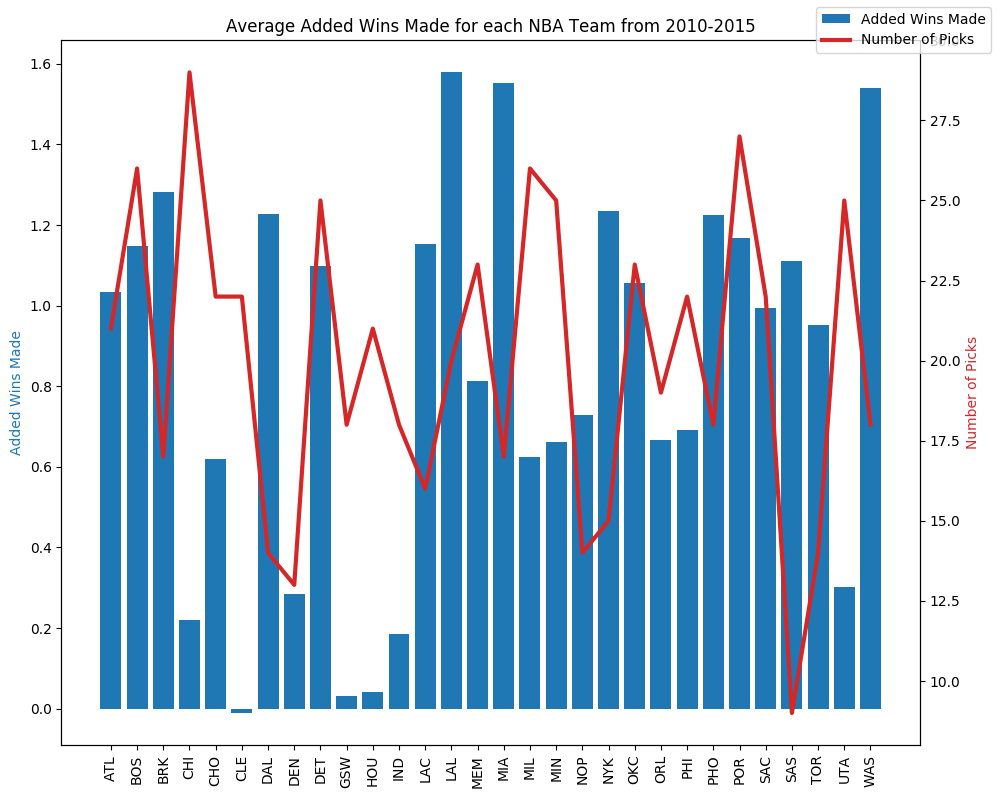

In [8]:
labels = resultsData.team.to_numpy()
x = range(len(labels))
heights = resultsData.addedWins.to_numpy()
avgHeight = np.mean(heights)
freq = resultsData.numPicks.to_numpy()

fig, ax1 = plt.subplots(figsize=(10,8), dpi=100)

color = 'tab:blue'
ax1.set_ylabel("Added Wins Made", color=color)
ax1.bar(x, heights, color=color, label="Added Wins Made")
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Number of Picks', color=color)  # we already handled the x-label with ax1
ax2.plot(x, freq, color=color, label="Number of Picks", linewidth=3)
fig.legend()
ax1.set_title("Average Added Wins Made for each NBA Team from 2010-2015")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [9]:
# plot the average value
oldWMs = []
newWMs = []
for i in range(len(simData)):
    oldPlayer = simData["oldPick"].iloc[i]
    newPlayer = simData["newPick"].iloc[i]
    
    oldWM = data[data["Name"]==oldPlayer].iloc[0]["WM"]
    newWM = data[data["Name"]==newPlayer].iloc[0]["WM"]
    
    if pd.isnull(oldWM) or pd.isnull(newWM):
        continue
    
    oldWMs.append(oldWM)
    newWMs.append(newWM)

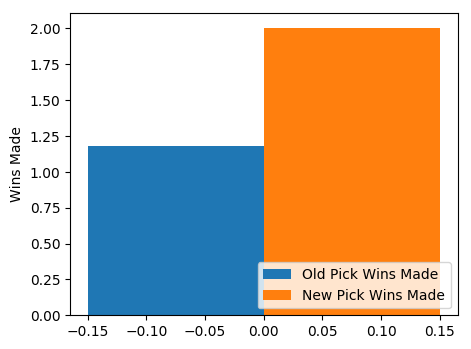

In [10]:
plt.figure(figsize=(5,4), dpi=100)
width = 0.15       # the width of the bars
r1 = width/2.
r2 = -width/2.

plt.bar(r2, [np.mean(oldWMs)], width=width, label="Old Pick Wins Made")
plt.bar(r1, [np.mean(newWMs)], width=width, label="New Pick Wins Made")

plt.ylabel("Wins Made")

plt.legend(loc="lower right")
plt.show()

In [13]:
np.mean(newWMs)/np.mean(oldWMs)

1.6962726618517907